### 1. El límite de difracción de un telescopio.

## a)
Okay, recordemos la regla de Simpson:
$$
I(a,b) \approx \frac{1}{3}h\left[f(a)+4f(a+h)+2f(a+2h)+4f(a+3h)+...+f(b) \right]
$$
$$
I(a,b) = \frac{1}{3}h\left[f(a)+f(b)+4\sum_{1}^{N-1}f(a+k_{par}h)+2\sum_{2}^{N-2}f(a+k_{impar}h) \right]
$$

In [ ]:
#Analizando que nos pide la formula.
#Necesitamos a, b, h y n. Donde a, b es el intervalo de integracion, h es el paso y n es el numero de pasos.
#Y f que es la función.
from pylab import *
import numpy as np
def Homero(f,a,b,n):
#f es la función, a y b son los limites de integración, n es el numero de puntos
    Int = 0
    h = (b-a)/n
    H = np.zeros(n+1)
    H[0] = f(a)
    H[-1] = f(b)
    for i in range(n+1):
        if i%2 == 0 and i>=2 and i<=n-2:
            H[i] = 2*f(a+i*h)
        if i%2 != 0 and i>=1 and i<=n-1:
            H[i] = 4*f(a+i*h)
        else:
            pass
    Int = (h/3)*np.sum(H)
    return Int

#Funciona, ahora vamos a ver a J(m,x)
def J(m,x):
    def f(theta):
        return cos(m*theta-x*sin(theta))
    return (1/np.pi)*Homero(f,0,pi,1000)
#Pero, la anterior solo funciona para un número, nosotros queremos modificarla para que funcione para un array.
def J_mod(m,x):
    return np.vectorize(J)(m,x)

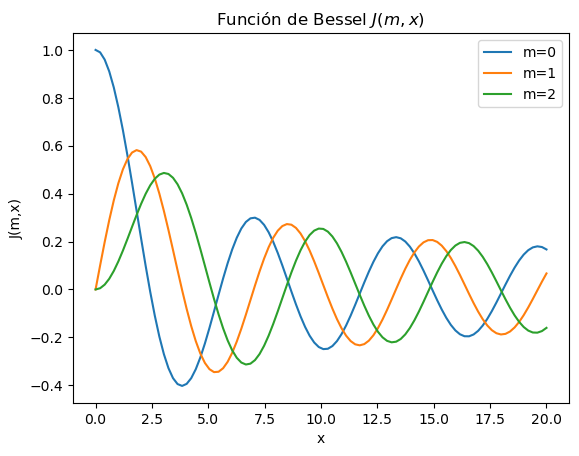

In [ ]:
x = linspace(0,20,100)
plot(x,J_mod(0,x),label='m=0')
plot(x,J_mod(1,x),label='m=1')
plot(x,J_mod(2,x),label='m=2')
xlabel(r'x')
ylabel(r'J(m,x)')
title(r'Función de Bessel $J(m,x)$')
legend()
show()

## b)

In [ ]:
from scipy import integrate

In [ ]:
# scipy.integrate.simpson(y, x=None, dx=1.0, axis=-1, even=None)

In [ ]:
#Primero analizemos lo que tenemos que darle de comer a integrate.simpson
#y es la función, x es el intervalo de integración, dx es el paso, axis es el eje de integración y even es para que sea par o impar.

def JimmyIntegradoalasociedad(m,x):
    def Jimmy(theta, m, x):
        return (1/np.pi)*np.cos(m*theta-x*np.sin(theta))
    theta_valores = np.linspace(0,np.pi,1000)
    y = []
    for theta in theta_valores:
        y_valores = Jimmy(theta, m, x)
        y.append(y_valores)
    Integrados =  integrate.simpson(y, theta_valores, axis=0, even= 'avg')
    return Integrados

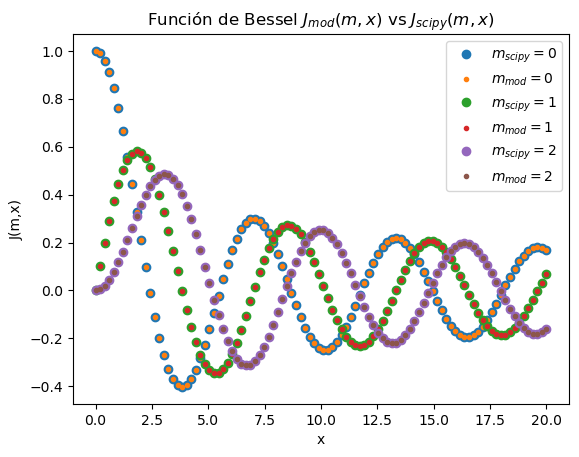

In [ ]:
x = linspace(0,20,100)
plot(x,JimmyIntegradoalasociedad(0,x),'o',label=r'$m_{scipy}=0$')
plot(x,J_mod(0,x),'.',label=r'$m_{mod}=0$')
plot(x,JimmyIntegradoalasociedad(1,x),'o',label=r'$m_{scipy}=1$')
plot(x,J_mod(1,x),'.',label=r'$m_{mod}=1$')
plot(x,JimmyIntegradoalasociedad(2,x),'o',label=r'$m_{scipy}=2$')
plot(x,J_mod(2,x),'.',label=r'$m_{mod}=2$')
xlabel(r'x')
ylabel(r'J(m,x)')
legend(loc  = 'upper right')
title(r'Función de Bessel $J_{mod}(m,x)$ vs $J_{scipy}(m,x)$')
show()
#mira mi hermano, hubiera hecho un for, si, pero pues ya.

In [ ]:
#Podriamos hacerla más grande, pero asi se aprecia que son casi iguales, pero mejor
#hagamos una comparación de los errores.
def Error(m,x):
    return abs(J_mod(m,x)-JimmyIntegradoalasociedad(m,x))
#Pues solo queremos ver que tanto difieren.


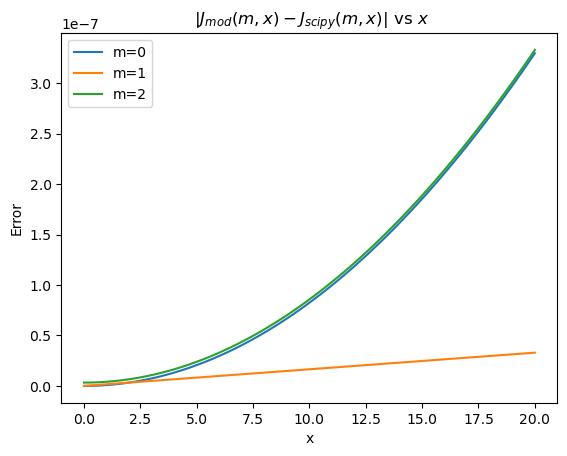

In [ ]:
x = linspace(0,20,100)
plot(x,Error(0,x),label='m=0')
plot(x,Error(1,x),label='m=1')
plot(x,Error(2,x),label='m=2')
xlabel(r'x')
ylabel(r'Error')
legend(loc = 'upper left')
title(r' $|J_{mod}(m,x)- J_{scipy}(m,x)|$ vs $x$')
show()

In [ ]:
#Me gustaria dar una explicación a porque difieren, pero sabes "it is what it is", bueno si, vemos que
#oscilan y por ende los números son más inestables.

## c)

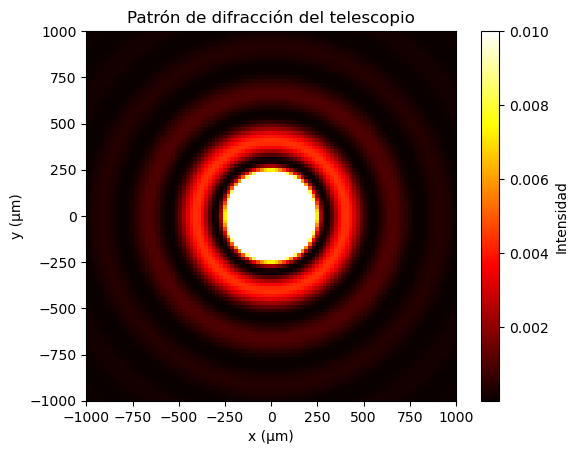

In [ ]:
lam = 500 # porque si pongo 500e-9 no veia nada y no cambia mucho
k = (2*pi)/lam # numero de onda
l = 1000 #aquí si afecta no poner el número bien sino solo se ve un circulo blanco o se ve un punto chiquito
N= 100
x = linspace(-l,l,N)
y = linspace(-l,l,N)
x,y = meshgrid(x,y) #esto es una maravilla que no conocia
R = sqrt(x**2+y**2) #voy a spamear esto cada vez que pueda

def I(r):
    return (J_mod(1,r*k)/(r*k))**2

#Esta fue una versión previa la cual nunca me gusto, porque tardaba cerca de 2 minutos en correr.
#Y en los ejercicios posteriores descubrí que podia solo evaluar una función en un array y me devolvia
#el array evaluado, lo cual me ahorro mucho tiempo.
#Tristemente esto me hizo darme cuenta de que lo que estaba mal optimizado eran mis funciones de Bessel.
#Y la de Simpson.
#Otra cosa que note es que no hay diferencia si agrego el caso uando kr se va a 0, se ve igual.

#Lo raro, no se ve como la imagen del profe pero en el libro de Newman son iguales, porque los circulos el profe
#son mas nitidos y pequeños, el de Newman si tiene este centro exagerado como el que me salió.


######################################################################
#for j in range(len(y)):
 #   for i in range(len(x)):
  #      erre = r[i,j]
   #     if erre == 0:
    #        intensidad  = (1/2)**2
     #       Ireal[i,j] = intensidad
      #  else:
       #     ksi = k*erre
        #    Jota = J_mod(1,ksi)
         #   intensidad = (Jota/ksi)**2
          #  Ireal[i,j] = intensidad
######################################################################

Ireal = I(R) #sobre advertencia no hay engaño, esto es una maravilla

plt.imshow(Ireal,origin='lower',vmax=0.01,extent=(-l,l,-l,l),cmap='hot')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.title('Patrón de difracción del telescopio')
plt.colorbar(label='Intensidad')

In [ ]:
#bajo casi 75% el tiempo de ejecución, podriamos seguir optimizando pero será en otro momento.

### 2. Error de estimación


## a)

In [ ]:
#Vamos a hacer una función, que en si solo es tomar un conjunto de puntos

def Trapecio(f,a,b,N):
    h = (b-a)/N
    suma = 0
    for i in range(1,N):
        suma += f(a+i*h)
    return (h/2)*(f(a)+f(b)+2*suma)
def f(x):
    return x**4-2*x+1

N = 10
I1 = Trapecio(f,0,2,N)
I2 = Trapecio(f,0,2,2*N)

error = (1/3)*(I2-I1)

#Obtenemos un error lit error
print(f'Tenemos que el error con la formula es {abs(error)}')
print(f'Y el error cuando lo comparamos con el resultado analitico es: {abs(4.4-I2)}')
#La razón para que no concuerden es que

Tenemos que el error con la formula es 0.026633333333333137
Y el error cuando lo comparamos con el resultado analitico es: 0.026660000000000572


## b)
Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla trapezoidal

In [ ]:
x = np.linspace(0, 2, 20)
integral = integrate.trapz(f(x), x)
print( integral)
print(abs(4.4-integral))

4.429539368175504
0.029539368175504066


In [ ]:
### ni modo, no se pudo python

### 3. Capacidad calorífica de un sólido

Primero que nada, estando leyendo la parte de la cuadratura de Gauss en el libro de Newman y pues, todo bien hasta que grafiqué... y en la parte C que fue que me salió que no era el valro esperado.

In [ ]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxwNM(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwabNM(N,a,b):
    x,w = gaussxwNM(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [ ]:
def gquaNM(N,function,a,b):
    xp, wp = gaussxwabNM(N,a,b)
    s = 0.0
    for k in range(N):
        s += wp[k]*function(xp[k])
    return s

In [ ]:
#Bueno usando lo que hicimos en clase.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def gauss_xw_ab_profe(N,a,b):
    x,w = sp.special.roots_legendre(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def CuadGauss_profe(N,f,a,b):
    S = 0
    w,x = gauss_xw_ab_profe(N,a,b)
    for i in range(N):
        S = S + w[i]*f(x[i])
    return S

In [ ]:
#me sigue comiendo la cabez porque según yo deberian ser iguales, o incluso mejor el del profe.

### a)

In [ ]:
def C_v_PROFE(T):
    V  = 1e-6 # m^3
    p = 6.022e28 # 1/m^3
    theta_D = 428 # K
    k_B = 1.3806e-23 # J/K
    N = 50
    a = 0
    def f(x):
        return (x**4)*np.exp(x)/(np.exp(x)-1)**2
    return 9*V*p*k_B*((T/theta_D)**3)*CuadGauss_profe(N,f,a,theta_D/T)
def C_v_NM(T):
    V  = 1e-6 # m^3
    p = 6.022e28 # 1/m^3
    theta_D = 428 # K
    k_B = 1.3806e-23 # J/K
    N = 50
    a = 0
    def f(x):
        return (x**4)*np.exp(x)/(np.exp(x)-1)**2
    return 9*V*p*k_B*((T/theta_D)**3)*gquaNM(N,f,a,theta_D/T)

### b)

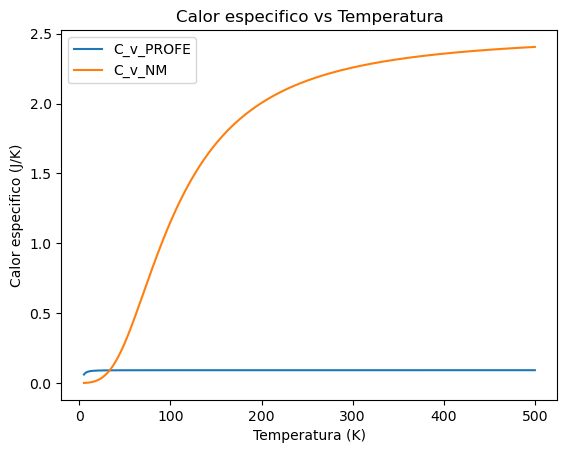

In [ ]:
T = np.linspace(5,500,500)
SPROFE = list()
SNM = list()
for temp in T:
    SPROFE.append(C_v_PROFE(temp))
    SNM.append(C_v_NM(temp))
plt.plot(T,SPROFE,label='C_v_PROFE')
plt.plot(T,SNM,label='C_v_NM')
plt.xlabel('Temperatura (K)')
#No, no es por el dominio, lo pensé porque en el inciso c salia muy pequeño el valor
#para la integral, no era descabellado, pero era del orden e-11, entonces pensé que
#era la escala, y si le damos un limite a y, resulta que no, no sé porque no funciona, me gustaria saber.
#Pero eso lo dejaremos para un futuro que no tenga tarea.
plt.ylabel('Calor especifico (J/K)')
plt.title('Calor especifico vs Temperatura')
plt.legend()
plt.show()

#### 4. Incertidumbre cuántica en el oscilador armónico

### a)

In [ ]:
def H(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return 2*x*H(n-1,x)-2*(n-1)*H(n-2,x)
#Aquí vamos a recibir n apartir de 2, es decir, n-1 = 1 y n-2 = 0, los cuales conocemos.
#Bueno, solo pongan n = -1 y nos deja usar esta formula.

In [ ]:
#Creanme que pensé que iba a ser de fácil, pero no, no lo fue.
#########################
#x = linspace(-4,4,100)
#M = x.shape[0]
#M = H(0,x)
#########################
#El problema radica con que los tamaño de los arrays no son compatibles, o sea, vean lo que estoy haciendo
#le doy un n, y 100 x, pero vamos a ver, eso no es posible.
# Si, primero hice el 7 y luego me regresé a estos ejercicios.
# tenemos [0,(1,2,3,4,5,6,7,8,9,10)] y lo que debemos hacer es:
# [(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,8),(0,9),(0,10),...]


In [ ]:
N = 100
Hs = np.zeros((4,N))
x = linspace(-4,4,N)

In [ ]:
Hs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

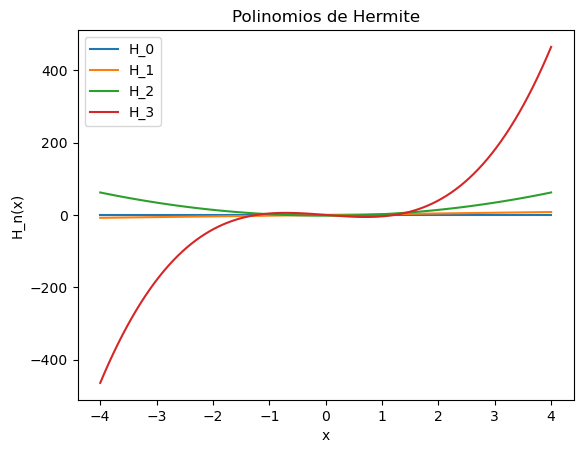

In [ ]:
#O sea, listo ya tenemos un lugar donde guardar los valores, y en nuestro caso la primera entrada es estatica (n)
#siendo sinceros me causa conflicto hacer lo siguiente:
for n in range(4):
  Hs[n,:] = H(n,x)
#Y la pregunta es ¿Por qué?, y bueno,más o menos entiendo porque, aquí la primera entrada de H es la misma,
#la segunda no, y en el ejercicio 7 ambas eran distintas kinda, o sea, para el row 0, Hs[0,:] = H(0,x)
#y para el row 1, Hs[1,:] = H(1,x), y así sucesivamente. O sea, como n no cambia ese atributo se repite para todos
#para el 1er elemento del array, es el row 0, la x1, el segundo elemento del array es el row 0, la x2, y así.
#Creo que por eso se puede, ni modo.
  plt.plot(x,Hs[n,:],label=f'H_{n}')
plt.xlabel('x')
plt.ylabel('H_n(x)')
plt.title('Polinomios de Hermite')
plt.legend()
plt.show()

### b)

In [ ]:
def Psi(n,x):
    return (1/np.sqrt(2**n*np.math.factorial(n)*np.sqrt(np.pi)))*np.exp(-x**2/2)*H(n,x)

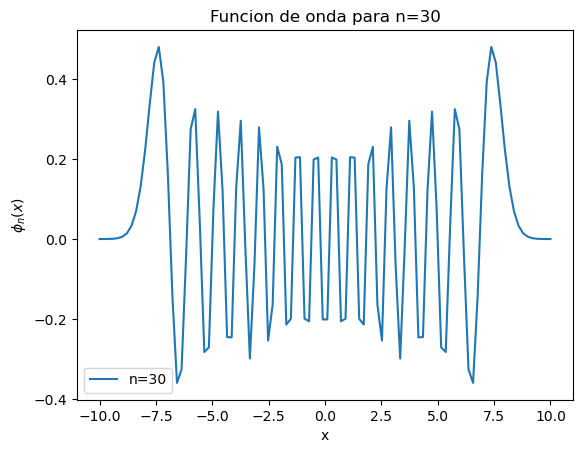

In [ ]:
n = 30
x = np.linspace(-10,10,100)
plt.plot(x,Psi(n,x),label=f'n={n}')
plt.xlabel('x')
plt.ylabel(r'$\phi_n(x)$')
plt.title('Funcion de onda para n=30')
plt.legend()
plt.show()

### c)
$$\braket{x^2} = \int_{-\infty}^{\infty}x^2 |\psi_{n}(x)|\, dx$$

Si tomamos el siguiente cambio de variable $x = \frac{z}{1-z^2}$ y $dx = \frac{1+z^2}{(1-z^2)^2}\, dz$ entonces podemos ver la integral como:
$$=\int_{-1}^{1}\left(\frac{z}{1-z^2}\right)^2 \psi_{n}\left(\frac{z}{1-z^2}\right)^2 \frac{1+z^2}{(1-z^2)^2}\, dz $$

In [ ]:
def f(z):
    n = 5
    A = (z/(1-z**2))
    B  = (1+z**2)/((1-z**2)**2)
    return A**2*B*abs(Psi(n,A))**2

N = 100
a = -1
b = 1

#Cuadratura de Gauss: Newman
print(f'El valor de la incertidumbre usando NM es: {sqrt(gquaNM(N,f,a,b))}')
#Cuadratura de Gauss: Profe
print(f'El valor de la incertidumbre usando PROFE es: {sqrt(CuadGauss_profe(N,f,a,b))}')

El valor de la incertidumbre usando NM es: 2.3452078737858177
El valor de la incertidumbre usando PROFE es: 2.8530194111556708e-11


#### 5. Atracción gravitacional de una lámina uniforme.

Bueno, tenemos que: $dF_z = \frac{G\vec{dM}\cdot\vec{m}}{r^2}$ y $\vec{dM}\cdot\vec{m} = ||dM||||M||cos\theta $ con $dM = M\frac{dxdy}{A}$ y haciendo el cambio de variable $z = |r|cos\theta$  y $r = \sqrt{x^2+y^2+z^2}$

$$F_z = \sigma G m z \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} \frac{ dx dy }{(x^2+y^2+z^2)^{3/2}}  $$


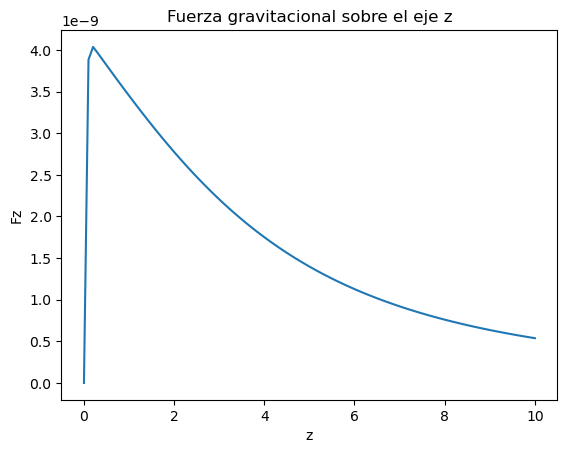

In [ ]:
G = 6.674e-11
L = 10
a ,b = -L/2, L/2
N = 100
sigma = 10
m = 1
##########################################
#def gquaNM(N,function,a,b):
#    xp, wp = gaussxwabNM(N,a,b)
#    s = 0.0
#    for k in range(N):
#        s += wp[k]*function(xp[k])
#    return s
##########################################

def gqua2NM(function):
    xp, wp = gaussxwabNM(N,a,b)
    s = 0.0
    for i in range(N):
        for j in range(N):
            s += wp[i]*wp[j]*function(xp[i],xp[j],z) #es lit aplicar la formula que nos dan en el ejercicio
            #con la ligera modificación de que se da z, pero solo se hace la int sobre 2 variables.
    return s
def dF(x,y,z):
    return (G*sigma*z*m)/(x**2+y**2+z**2)**(3/2)

Z = linspace(0,10,N)
#Necesitamos generar los valores para z, en gquad solo genera para x y y.
R = list() #pues aqui debemos guardar los valores xd
for z in Z:
    R.append(gqua2NM(dF)) #pues la integral xd
plt.plot(Z,R) #ploteamos
plt.xlabel('z')
plt.ylabel('Fz')
plt.title('Fuerza gravitacional sobre el eje z')
plt.show()

In [ ]:
#Pues quitamos los puntos de la frontera y ya sencillo

#### 6. Diferenciación númerica

In [ ]:
def f_6(x):
    return 1+(1/2)*tanh(2*x)

def f_6DA(x):
    return (1/cosh(2*x))**2

Bueno, si recordamos la definicíon de Derivada Central (CD):
$$
\frac{df}{dx}\approx \frac{f(x+h/2)-f(x-h/2)}{h}
$$
Para nosotros resulta imposible usar esta definición, pues a la hora de generar los puntos, o en un escenario general, sabemos que estan separados una distancia h, lo que podriamos hacer para usar esta situación, es sólo decir $h = 2h$, entonces:
$$
\frac{df}{dx}_{Central}\approx \frac{f(x+h)-f(x-h)}{2h}
$$


In [ ]:
#Dejo esto para la posteridad porque si, hay veces en las que reviso mi código y no sé porque
#no lo hice de cierta manera, y veo las versiones pasadas y digo: "ah, que menso estaba".
##############################################
#def CD(f,a,b,N):                            #
#    Dev = zeros(N)                          #
#    x = linspace(a,b,N)                     #
#    h = (b-a)/N                             #
#    for i in range(2,N-2):                  #
#        Dev[i] = (f(i+h/2)-f(i-h/2))/h      #
#    return Dev                              #
##############################################

#Bueno, la idea básica que tenia era generar un array de puntos, es decir, tomamos a la f y guardamos
#los puntos evaluados en cierto dominio, que por accesibilidad pues se lo dejamos al usuario (yo).

#Una vez que tenemos el array de los puntos de f, nosotros al principio tambien decidimos cual seria
#la separación, nuevamente un dato que entrara el usuario (N)
#EDIT: la separación la calculamos nostros, o sea, si, para este caso podemos.

#Como es CD entonces estamos restringidos a los puntos 2,N-1, en el caso de Python que cuenta desde 0
#se traduce a 1,N-1.

#También deberiamos hacer un array del tamaño de N, es decir, cada valor de f[i] va hacia Dev[i].
#Como ya dije, no podemos calcular la derivada en los puntos de la frontera, para eso vamos a hacer uso
#de la  Foward and Backward Derivada.

$$
\frac{df}{dx}_{Foward}\approx \frac{f(x+h)-f(x)}{h}
$$
$$
\frac{df}{dx}_{Backward}\approx \frac{f(x)-f(x-h)}{h}
$$

In [ ]:
#Con estas ideas vamos a hacer la función
def Dev(f,x):
#le pedimos f y el Dominio
#Explicación, resulta que podemos definir un linspace y si yo pongo no sé
#f_6(x) me regresa esos puntos XD, por lo que decidi dejar adentro ese generador
#Nop, no funciono, bueno no sé, lo vemos pal siguiente patch
    Dev = zeros_like(f)
    Dobleh, h = x[2]-x[0] , x[1]-x[0]
    #CD
    for i in range(1,len(f)-1):
        Dev[i] = (f[i+1]-f[i-1])/Dobleh
    #FD
    Dev[0] = (f[1]-f[0])/h
    #BD
    Dev[-1] = (f[-1]-f[-2])/h
    return Dev
#Necesito plotear ok.

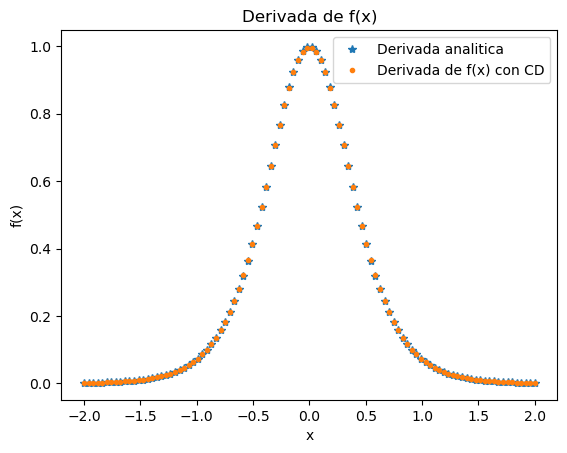

In [ ]:
x = linspace(-2,2,100)
plot(x,f_6DA(x),'*',label='Derivada analitica')
plot(x,Dev(f_6(x),x),'.',label='Derivada de f(x) con CD')
xlabel('x')
ylabel('f(x)')
title('Derivada de f(x)')
legend()
show()

### 7. Procesamiento de imagenes y STM


In [ ]:
from pylab import*
import numpy as np

In [ ]:
from numpy import loadtxt
a = loadtxt('altitudes.txt',float)

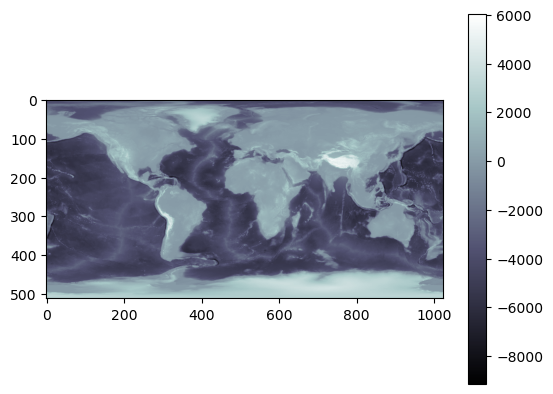

In [ ]:
plt.imshow(a)
plt.colorbar()
plt.bone()
plt.show()

In [ ]:
#nah amigo, despues de que pude plotear la imagen vine a ver como se veian los datos inciales y ahora no sé si está del todo bien mi trabajo porque es
#muy similar a lo que tenia que salir, o sea.
#tal vez le pude haber movido a la izquierda .00001 mm y decir que listo.

In [ ]:
np.shape(a)

(512, 1024)

In [ ]:
print(a)

[[-4116.06 -4114.78 -4113.87 ... -4122.67 -4120.08 -4117.81]
 [-3969.33 -3959.2  -3949.72 ... -4007.06 -3993.46 -3980.39]
 [-2652.85 -2647.95 -2648.86 ... -2720.04 -2691.39 -2666.93]
 ...
 [ 2981.16  2979.56  2977.87 ...  2986.03  2984.54  2982.82]
 [ 2897.12  2896.19  2895.3  ...  2900.22  2899.22  2898.19]
 [ 2785.31  2785.22  2785.14 ...  2785.62  2785.57  2785.44]]


In [ ]:
print(a[-1,-1])

2785.44


### a)

In [ ]:
#Okay, vemos que tenemos una matriz, donde los datos tomaron valores para un array del tipo:
#si vas para abajo x aumenta, y si vas para los lados y.
#El punto es que tenemos que usar los tres tipos de derivadas (C,F,B), y si, así como lo voy a escribir,
#para 9 casos ._.

$$
\begin{bmatrix}
\textcolor{orange}{W(x_0,y_0)} & \textcolor{yellow}{W(x_0,y_1)} & \textcolor{yellow}{W(x_0,y_2)} & \textcolor{yellow}{.} & \textcolor{yellow}{.} &\textcolor{yellow}{.} &\textcolor{yellow}{W(x_0,y_{N-1})} & \textcolor{purple}{W(x_0,y_N)}\\

\textcolor{blue}{W(x_2,y_1)} & \textcolor{red}{W(x_2,y_2)} & \textcolor{red}{W(x_2,y_3)} & \textcolor{red}{.} & \textcolor{red}{.} &\textcolor{red}{.} &\textcolor{red}{W(x_3,y_N)} &\textcolor{pink}{W(x_2,y_N)} \\

\textcolor{blue}{W(x_3,y_1)}& \textcolor{red}{W(x_3,y_2)} & \textcolor{red}{W(x_3,y_3)} & \textcolor{red}{.} & \textcolor{red}{.} &\textcolor{red}{.} &\textcolor{red}{W(x_3,y_N)} &\textcolor{pink}{W(x_3,y_N)} \\

\textcolor{blue}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{pink}{.} \\  

\textcolor{blue}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{pink}{.} \\

\textcolor{blue}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{red}{.} & \textcolor{pink}{.} \\

\textcolor{blue}{W(x_3,y_1)}& \textcolor{red}{W(x_3,y_2)} & \textcolor{red}{W(x_3,y_3)} & \textcolor{red}{.} & \textcolor{red}{.} &\textcolor{red}{.} &\textcolor{red}{W(x_{M-1},y_N)} &\textcolor{pink}{W(x_3,y_N)} \\

\textcolor{blue}{W(x_{M-1},y_1)}& \textcolor{red}{W(x_{M-1},y_2)} & \textcolor{red}{W(x_{M-1},y_3)} & \textcolor{red}{.} & \textcolor{red}{.} &\textcolor{red}{.}  &\textcolor{red}{W(x_{M-1},y_N)} & \textcolor{pink}{W(x_{M-1},y_N)} \\

\textcolor{magenta}{W(x_M,y_1)}  &\textcolor{lime}{ W(x_M,y_2)} & \textcolor{lime}{W(x_M,y_3)} & \textcolor{lime}{.} & \textcolor{lime}{.}&\textcolor{lime}{.} & \textcolor{lime}{W(x_{M-1},y_N)} & \textcolor{green}{W(x_M,y_N)} \\

\end{bmatrix}
$$

In [ ]:
def CBF_ARRAY(w,h):
    ADERIVADOX = zeros_like(w)
    ADERIVADOY = zeros_like(w)
    FABELAS = len(w)-1
    OVENS = len(w[0])-1


#####################################
#CASO RED:CC
    for i in range(1,FABELAS): #x
        for j in range(1,OVENS): #y
#Aquí el razonamiento es el siguiente, en realidad debemos sacar dos valores de w(x,y)
# Su derivada parcial respecto a x y respecto a y, pero el bucle anidado for nos da un valor, y
# para no gastar tiempo es mejor hacer las dos operaciones en ese respectivo valor, pues ya tenemos calculados
# los puntos aledaños.
             ADERIVADOX[i,j] = (w[i+1,j]-w[i-1,j])/(2*h)
             ADERIVADOY[i,j] = (w[i,j+1]-w[i,j-1])/(2*h)

################################


#CASO YELLOW:FC
    for j in range(1,OVENS):
        #i = 0
        #FOWARD
        ADERIVADOX[0,j] = (w[1,j]-w[0,j])/h
        #CENTRAL
        ADERIVADOY[0,j] =(w[0,j+1]-w[0,j-1])/(2*h)
#CASO PINK:CB
    for i in range(1,FABELAS):
        #j =-1, el último así es.
        #CENTRAL
        ADERIVADOX[i,-1] = (w[i+1,-1]-w[i-1,-1])/(2*h)
        #BACKWARD
        ADERIVADOY[i,-1] = (w[i,-1]-w[i,-2])/h
#caso LIME:BC
    for j in range(1,OVENS):
        #i = -1
        #BACKWARD
        ADERIVADOX[0,j] = (w[-1,j]-w[-2,j])/h
        #CENTRAL
        ADERIVADOY[0,j] =(w[-1,j+1]-w[-1,j-1])/(2*h)
#CASO BLUE:CF
    for i in range(1,FABELAS):
        #j = 0, el último así es.
        #CENTRAL
        ADERIVADOX[i,0] = (w[i+1,0]-w[i-1,0])/(2*h)
        #FOWARD
        ADERIVADOY[i,0] = (w[i,1]-w[i,0])/h

######################################################

#CASO ORANGE:FF

    ADERIVADOX[0,0] = (w[1,0]-w[0,0])/h
    ADERIVADOY[0,0] = (w[0,1]-w[0,0])/h

#CASO PURPLE:FB
    ADERIVADOX[0,-1] = (w[1,-1]-w[0,-1])/h
    ADERIVADOY[0,-1] = (w[0,-1]-w[0,-2])/h


#CASO GREEN:BB
    ADERIVADOX[-1,-1] = (w[-1,-1]-w[-2,-1])/h
    ADERIVADOY[-1,-1] = (w[-1,-1]-w[-1,-2])/h


#CASO MAGENTA:BF
    ADERIVADOX[-1,0] = (w[-1,0]-w[-2,0])/h
    ADERIVADOY[-1,0] = (w[-1,1]-w[-1,0])/h
    return ADERIVADOX,ADERIVADOY

In [ ]:
#Bueno, no se si aumente, pero hay puntos en los casos que voy a describir:

#F: FOWARD

#B: BACKWARD

#C: CENTRAL

#Donde manejamos la nonmenclatura habitual, XY.

#ORANGE----FF   #YELLOW----FC #PURPLE----FB

#BLUE------CF   #RED-------CC #PINK------CB

#MAGENTA---BF   #LIME------BC #GREEN-----BB

My guy, lo hemos logrado, creeme que no pensé que fuera funcionar a la primera, pero lo hizó xD

Ahora, lo único que queda es juntarlos, porque creo que no lo dije explicitamente, y no, no voy a tocar ese programa, ya jalo, hay que dejarlo como está.

Lo que pasa, es como dije, si, sacamos las derivadas parciales de un punto, pero se generan dos puntos para ese mismo punto.
Y nosotros vamos a calcular $$ I(\phi,\partial w/\partial x,\partial w/\partial y)$$

In [ ]:
DX , DY  = CBF_ARRAY(a,30000)

In [ ]:
shape = DX.shape
DXY = np.empty(shape, dtype=object)
for i in range(shape[0]):
    for j in range(shape[1]):
        DXY[i,j] = (DX[i,j], DY[i,j])


In [ ]:
len(DXY[0])

1024

In [ ]:
shape

(512, 1024)

### b)

In [ ]:
#Tenemos a DXY, lo único que vamos a hacer es generar los puntos I
phi = 45 #grados
I = zeros_like(DXY)
for i in range(len(DXY)):
    for j in range(len(DXY[0])):
        partial = DXY[i,j]
        dx = partial[0]
        dy = partial[1]
        I[i,j] = (dx*np.cos(phi)+dy*np.sin(phi))/(dx**2+dy**2+1)**(1/2)



In [ ]:
print(I.dtype)

object


In [ ]:
I = I.astype(np.float64)

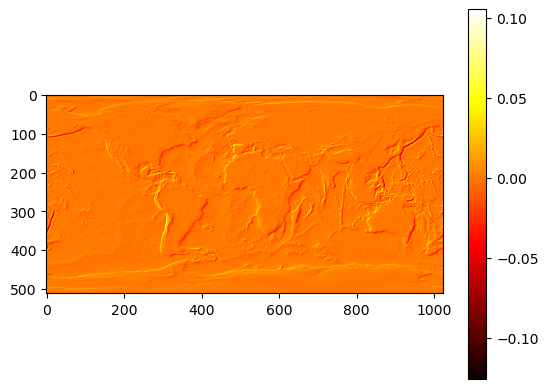

In [ ]:
plt.imshow(I)
plt.colorbar()
plt.hot()
plt.show()

### c)

In [ ]:
from numpy import loadtxt
b = loadtxt('stm.txt',float)

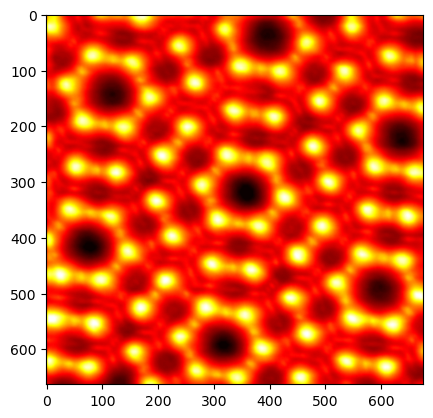

In [ ]:
plt.imshow(b)

In [ ]:
dx , dy =CBF_ARRAY(b,2.5)

In [ ]:
shape2 = dx.shape
dxy = np.empty(shape2, dtype=object)
for i in range(shape2[0]):
    for j in range(shape2[1]):
        dxy[i,j] = (dx[i,j], dy[i,j])

In [ ]:
phi = 45 #grados
Iz = zeros_like(dxy)
for i in range(len(dxy)):
    for j in range(len(dxy[0])):
        partial = dxy[i,j]
        dxx = partial[0]
        dyy = partial[1]
        Iz[i,j] = (dxx*np.cos(phi)+dyy*np.sin(phi))/(dxx**2+dyy**2+1)**(1/2)

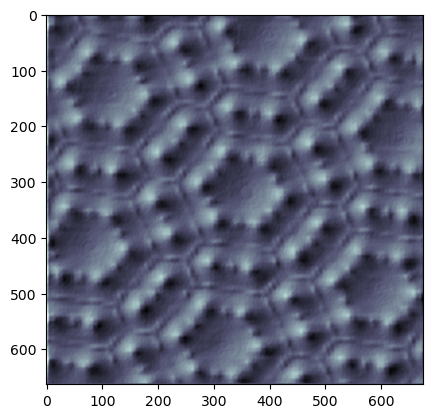

In [ ]:
Iz = Iz.astype(np.float64)
plt.imshow(Iz)
plt.bone()
#use el bone, porque le hot no deja ver

In [1]:
def colab2pdf():
    # Colab2PDF by Drengskapur (https://github.com/drengskapur/colab2pdf)
    # @title Convert Colab Notebook to PDF {display-mode:'form'}
    # VERSION 1.3
    # LICENSE: GPL-3.0-or-later
    !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null
    import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml;locale.setlocale(locale.LC_ALL,'en_US.UTF-8')
    def convert(b):
        try:
            s.value='⚙️ Converting...';b.disabled=True;get_ipython().events.register('post_execute',lambda:IPython.display.display(IPython.display.Javascript('document.querySelectorAll("#output-footer").forEach(footer=>footer.remove());')))
            n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
            p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning)
            nb=[cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4).cells if '--Colab2PDF' not in cell.source]
            with (p/f'{n.stem}.ipynb').open('w',encoding='utf-8') as cp:nbformat.write(nbformat.v4.new_notebook(cells=nb or [nbformat.v4.new_code_cell('#')]),cp)
            with (p/'config.yml').open('w',encoding='utf-8') as f:yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
            !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
            google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'🎉 Downloaded {n.stem}.pdf'
        except Exception as e:
            s.value=f'⚠️ ERROR {str(e)}'
        finally:
            b.disabled=False
    if not pathlib.Path('/usr/local/bin/quarto').exists():
        !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' -P {p} && dpkg -i {p}/quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet
    b=ipywidgets.widgets.Button(description='⬇️ Download PDF');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
    IPython.display.display(IPython.display.Javascript('document.currentScript.parentElement.closest(".output_subarea").querySelector("#output-footer > input").remove();'))
colab2pdf()

<IPython.core.display.Javascript object>